<a href="https://colab.research.google.com/github/bala-baskar/aiml_tech_courses/blob/main/pytorch/04_pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Exercises Template

In [41]:
# Import torch
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.5.1+cu124


'cpu'

In [42]:
if device == 'cuda':
  # Check for GPU
  !nvidia-smi

In [43]:
# 1. Get data
!wget "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip"
!unzip -q pizza_steak_sushi_20_percent.zip

--2025-02-20 11:13:29--  https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/data/pizza_steak_sushi_20_percent.zip [following]
--2025-02-20 11:13:29--  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/data/pizza_steak_sushi_20_percent.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31491084 (30M) [application/zip]
Saving to: ‘pizza_steak_sushi_20_percent.zip.1’

pizza_steak_sushi_2 100%[===================>]  30.03M   175MB/s    in 0.2s    


In [52]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [53]:
# Setup train and testing paths
data_path = '/content'
walk_through_dir('/content/train')
walk_through_dir('/content/test')
train_path = os.path.join(data_path, 'train')
test_path = os.path.join(data_path, 'test')
print(train_path, test_path)

There are 3 directories and 0 images in '/content/train'.
There are 0 directories and 146 images in '/content/train/steak'.
There are 0 directories and 154 images in '/content/train/pizza'.
There are 0 directories and 150 images in '/content/train/sushi'.
There are 3 directories and 0 images in '/content/test'.
There are 0 directories and 58 images in '/content/test/steak'.
There are 0 directories and 46 images in '/content/test/pizza'.
There are 0 directories and 46 images in '/content/test/sushi'.
/content/train /content/test


In [54]:
class_names = os.listdir(train_path)
print(class_names)

['steak', 'pizza', 'sushi']


In [55]:
train_files = dict()
for c in class_names:
  train_files[c] = os.listdir(os.path.join(train_path,c))

Height: 512
Width: 512
Class Name : steak


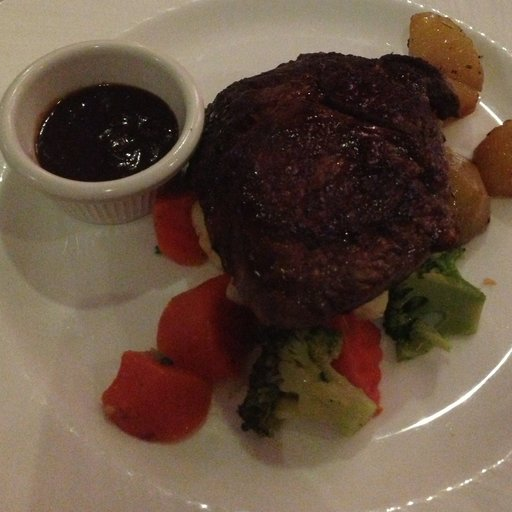

In [56]:
# Visualize an image
from PIL import Image
import random

cls = random.choice(class_names)
img_idx = random.randint(0,len(train_files[cls]))
img = Image.open(os.path.join(train_path,cls,train_files[cls][img_idx]))
print(f"Height: {img.height}")
print(f"Width: {img.width}")
print(f"Class Name : {cls}")
img

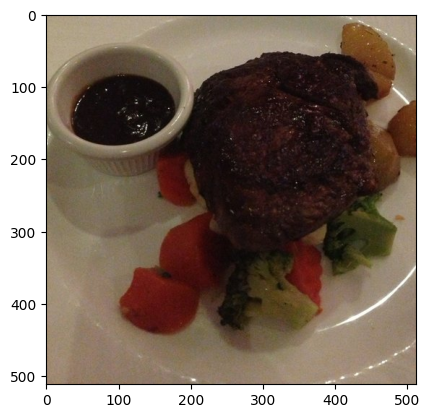

In [57]:
# Do the image visualization with matplotlib
img_as_array = np.asarray(img)
plt.imshow(img_as_array)

In [58]:
# 3.1 Transforming data with torchvision.transforms
from torchvision import transforms
from torch.utils.data import DataLoader

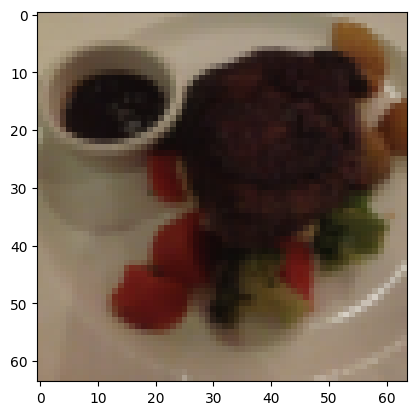

In [59]:
# Write transform for turning images into tensors
img_transformer = transforms.Compose([transforms.Resize(size=(64,64)),
                                      transforms.RandomHorizontalFlip(0.3),
                                      transforms.ToTensor()])
plt.imshow(img_transformer(img).permute(1,2,0))

In [60]:
img_transformer(img).permute(1,2,0).shape

torch.Size([64, 64, 3])

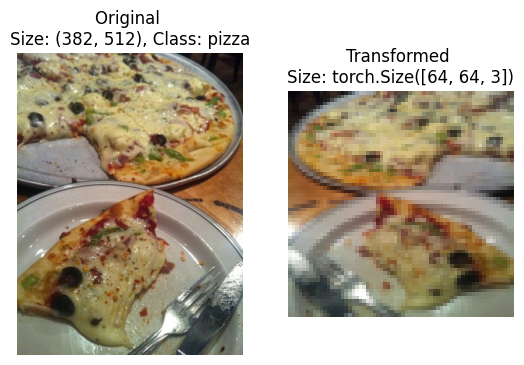

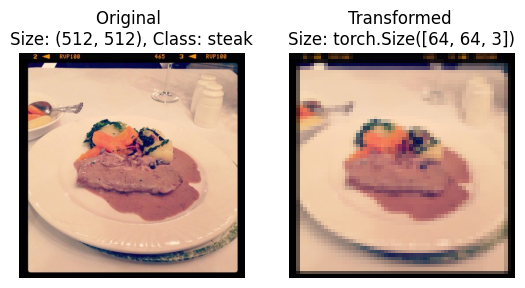

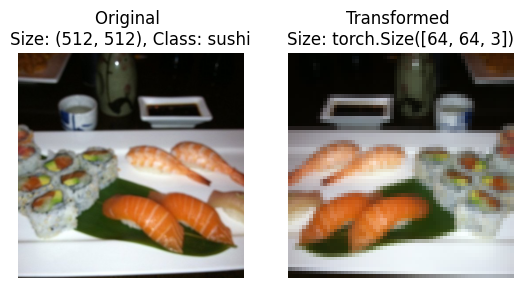

In [61]:
# Write a function to plot transformed images
def plot_transfomed_images(img_path_folder=train_path,n_images=3):
  # Get random n_images from the path
  random_images,random_img_class = [], []
  for iter in range(n_images):
    cls = random.choice(class_names)
    img_idx = random.randint(0,len(train_files[cls]))
    img = Image.open(os.path.join(train_path,cls,train_files[cls][img_idx]))

    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img)
    ax[0].set_title(f"Original \nSize: {img.size}, Class: {cls}")
    ax[0].axis("off")

    img_tr = img_transformer(img).permute(1,2,0)
    ax[1].imshow(img_tr)
    ax[1].set_title(f"Transformed \nSize: {img_tr.shape}")
    ax[1].axis("off")

plot_transfomed_images(img_path_folder=train_path,n_images=3)

### Load image data using `ImageFolder`

In [62]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_path,
                                  transform=img_transformer,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_path,
                                 transform=img_transformer)
print(train_data, test_data)

Dataset ImageFolder
    Number of datapoints: 450
    Root location: /content/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.3)
               ToTensor()
           ) Dataset ImageFolder
    Number of datapoints: 150
    Root location: /content/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.3)
               ToTensor()
           )


In [63]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [64]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [65]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(450, 150)

In [66]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader = DataLoader(dataset=test_data,batch_size=BATCH_SIZE)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f21e2afdf90>,
 <torch.utils.data.dataloader.DataLoader at 0x7f21e2b58bd0>)

In [67]:
# How many batches of images are in our data loaders?
img, label = next(iter(train_dataloader))
print(img.shape)
img, label = next(iter(test_dataloader))
print(img.shape)

torch.Size([32, 3, 64, 64])
torch.Size([32, 3, 64, 64])


pizza


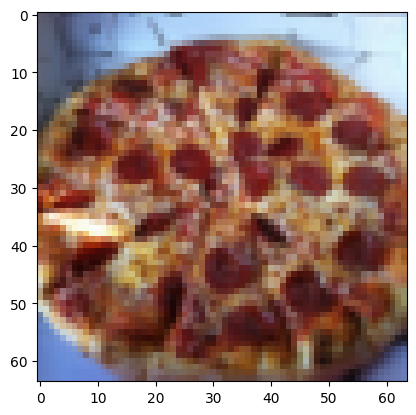

In [68]:
print(class_names[label[0].item()])
plt.imshow(img[0].permute(1,2,0))

In [69]:
class TinyVGG(nn.Module):
  def __init__(self,input_shape,hidden_units,output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2))
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2))
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16,
                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

In [70]:
torch.manual_seed(42)
model = TinyVGG(input_shape=3,hidden_units=10,output_shape=3).to(device)
model

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [71]:
# Install torchinfo if it's not available, import it if it is
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [87]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0
  data_count = 0
  # Loop through data loader and data batches
  for X_batch, y_batch in dataloader:
    # Send data to target device
    X_batch, y_batch = X_batch.to(device), y_batch.to(device)
    # 1. Forward pass
    y_pred_train = model(X_batch)
    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred_train,y_batch)
    train_loss += loss.item()
    data_count += len(X_batch)
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    y_pred_class = torch.softmax(y_pred_train,dim=1).argmax(dim=1)
    train_acc += (y_pred_class == y_batch).sum().item()/len(y_batch)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [102]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0
  data_count = 0
  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for X_batch, y_batch in dataloader:
      # Send data to target device
      X_batch, y_batch = X_batch.to(device), y_batch.to(device)

      # 1. Forward pass
      y_pred_test = model(X_batch)

      # 2. Calculuate and accumulate loss
      loss = loss_fn(y_pred_test,y_batch)
      test_loss += loss.item()
      data_count += len(X_batch)
      # print(loss, test_loss,data_count)
      # Calculate and accumulate accuracy
      y_pred_class = torch.softmax(y_pred_test,dim=1).argmax(dim=1)
      test_acc += (y_pred_class == y_batch).sum().item()/len(y_batch)
      # print((y_pred_class == y_batch).sum().item(), test_acc, len(y_batch))
  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [74]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.

In [106]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model = TinyVGG(input_shape=3,hidden_units=10,output_shape=3).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=0.001)
# Training the model with EPOCHS = 5
results = train(model,
                train_dataloader,
                test_dataloader,
                optimizer,
                loss_fn,
                epochs=5)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1074 | train_acc: 0.3458 | test_loss: 1.0968 | test_acc: 0.3625
Epoch: 2 | train_loss: 1.0994 | train_acc: 0.3042 | test_loss: 1.1001 | test_acc: 0.3750
Epoch: 3 | train_loss: 1.0949 | train_acc: 0.3667 | test_loss: 1.0992 | test_acc: 0.2875
Epoch: 4 | train_loss: 1.0569 | train_acc: 0.4417 | test_loss: 1.0352 | test_acc: 0.4392
Epoch: 5 | train_loss: 0.9985 | train_acc: 0.5146 | test_loss: 0.9465 | test_acc: 0.5199


In [107]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model = TinyVGG(input_shape=3,hidden_units=10,output_shape=3).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=0.001)
# Training the model with EPOCHS = 5
results = train(model,
                train_dataloader,
                test_dataloader,
                optimizer,
                loss_fn,
                epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1074 | train_acc: 0.3458 | test_loss: 1.0968 | test_acc: 0.3625
Epoch: 2 | train_loss: 1.0994 | train_acc: 0.3042 | test_loss: 1.1001 | test_acc: 0.3750
Epoch: 3 | train_loss: 1.0949 | train_acc: 0.3667 | test_loss: 1.0992 | test_acc: 0.2875
Epoch: 4 | train_loss: 1.0569 | train_acc: 0.4417 | test_loss: 1.0352 | test_acc: 0.4392
Epoch: 5 | train_loss: 0.9985 | train_acc: 0.5146 | test_loss: 0.9465 | test_acc: 0.5199
Epoch: 6 | train_loss: 0.9503 | train_acc: 0.5000 | test_loss: 0.9253 | test_acc: 0.5540
Epoch: 7 | train_loss: 0.8951 | train_acc: 0.5813 | test_loss: 0.9094 | test_acc: 0.5886
Epoch: 8 | train_loss: 0.8675 | train_acc: 0.6146 | test_loss: 0.9436 | test_acc: 0.5409
Epoch: 9 | train_loss: 0.8639 | train_acc: 0.5938 | test_loss: 0.9054 | test_acc: 0.5659
Epoch: 10 | train_loss: 0.9210 | train_acc: 0.6042 | test_loss: 0.8978 | test_acc: 0.5915
Epoch: 11 | train_loss: 0.8565 | train_acc: 0.6208 | test_loss: 0.9160 | test_acc: 0.5847
Epoch: 12 | train_l

In [118]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model = TinyVGG(input_shape=3,hidden_units=10,output_shape=3).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=0.001)
# Training the model with EPOCHS = 5
results = train(model,
                train_dataloader,
                test_dataloader,
                optimizer,
                loss_fn,
                epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1074 | train_acc: 0.3458 | test_loss: 1.0968 | test_acc: 0.3625
Epoch: 2 | train_loss: 1.0994 | train_acc: 0.3042 | test_loss: 1.1001 | test_acc: 0.3750
Epoch: 3 | train_loss: 1.0949 | train_acc: 0.3667 | test_loss: 1.0992 | test_acc: 0.2875
Epoch: 4 | train_loss: 1.0569 | train_acc: 0.4417 | test_loss: 1.0352 | test_acc: 0.4392
Epoch: 5 | train_loss: 0.9985 | train_acc: 0.5146 | test_loss: 0.9465 | test_acc: 0.5199
Epoch: 6 | train_loss: 0.9503 | train_acc: 0.5000 | test_loss: 0.9253 | test_acc: 0.5540
Epoch: 7 | train_loss: 0.8951 | train_acc: 0.5813 | test_loss: 0.9094 | test_acc: 0.5886
Epoch: 8 | train_loss: 0.8675 | train_acc: 0.6146 | test_loss: 0.9436 | test_acc: 0.5409
Epoch: 9 | train_loss: 0.8639 | train_acc: 0.5938 | test_loss: 0.9054 | test_acc: 0.5659
Epoch: 10 | train_loss: 0.9210 | train_acc: 0.6042 | test_loss: 0.8978 | test_acc: 0.5915
Epoch: 11 | train_loss: 0.8565 | train_acc: 0.6208 | test_loss: 0.9160 | test_acc: 0.5847
Epoch: 12 | train_l

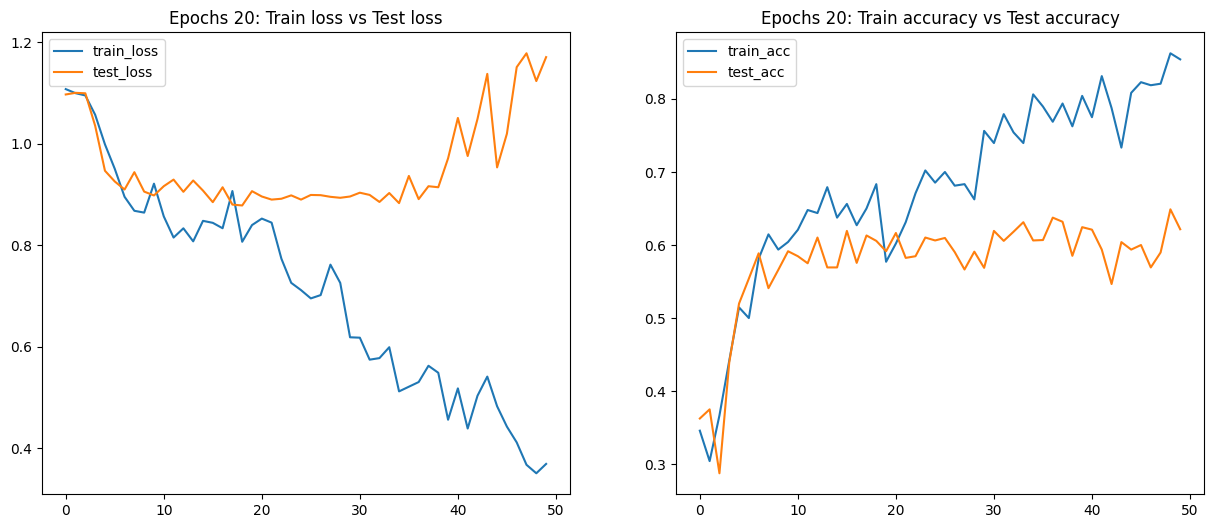

In [120]:
import seaborn as sns
epochs = 50
fig, ax = plt.subplots(1,2,figsize = (15,6))
sns.lineplot(x=range(epochs),y=results['train_loss'],label='train_loss',ax=ax[0])
sns.lineplot(x=range(epochs),y=results['test_loss'],label='test_loss',ax=ax[0])
ax[0].set_title("Epochs 20: Train loss vs Test loss")

sns.lineplot(x=range(epochs),y=results['train_acc'],label='train_acc',ax=ax[1])
sns.lineplot(x=range(epochs),y=results['test_acc'],label='test_acc',ax=ax[1])
ax[1].set_title("Epochs 20: Train accuracy vs Test accuracy")
plt.show()

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [108]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model = TinyVGG(input_shape=3,hidden_units=10*2,output_shape=3).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=0.001)
# Training the model with EPOCHS = 5
results = train(model,
                train_dataloader,
                test_dataloader,
                optimizer,
                loss_fn,
                epochs=20)


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1040 | train_acc: 0.3396 | test_loss: 1.0998 | test_acc: 0.2875
Epoch: 2 | train_loss: 1.0849 | train_acc: 0.4104 | test_loss: 1.0906 | test_acc: 0.3312
Epoch: 3 | train_loss: 1.0081 | train_acc: 0.4896 | test_loss: 0.9415 | test_acc: 0.5080
Epoch: 4 | train_loss: 0.8636 | train_acc: 0.6271 | test_loss: 0.9438 | test_acc: 0.5108
Epoch: 5 | train_loss: 0.8524 | train_acc: 0.6333 | test_loss: 0.9024 | test_acc: 0.5528
Epoch: 6 | train_loss: 0.8684 | train_acc: 0.5979 | test_loss: 0.8922 | test_acc: 0.5665
Epoch: 7 | train_loss: 0.8284 | train_acc: 0.6333 | test_loss: 0.8904 | test_acc: 0.5670
Epoch: 8 | train_loss: 0.8892 | train_acc: 0.5750 | test_loss: 0.8697 | test_acc: 0.6443
Epoch: 9 | train_loss: 0.8583 | train_acc: 0.6083 | test_loss: 1.0515 | test_acc: 0.4125
Epoch: 10 | train_loss: 0.8636 | train_acc: 0.6083 | test_loss: 0.9063 | test_acc: 0.5216
Epoch: 11 | train_loss: 0.8263 | train_acc: 0.6375 | test_loss: 0.9574 | test_acc: 0.5568
Epoch: 12 | train_l

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

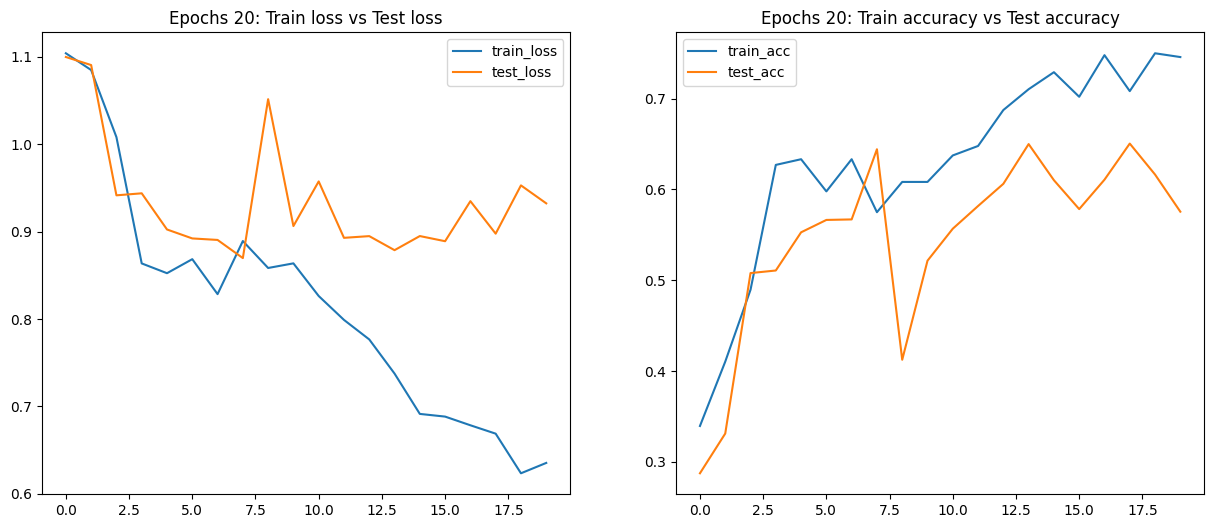

In [117]:
import seaborn as sns
fig, ax = plt.subplots(1,2,figsize = (15,6))
sns.lineplot(x=range(20),y=results['train_loss'],label='train_loss',ax=ax[0])
sns.lineplot(x=range(20),y=results['test_loss'],label='test_loss',ax=ax[0])
ax[0].set_title("Epochs 20: Train loss vs Test loss")

sns.lineplot(x=range(20),y=results['train_acc'],label='train_acc',ax=ax[1])
sns.lineplot(x=range(20),y=results['test_acc'],label='test_acc',ax=ax[1])
ax[1].set_title("Epochs 20: Train accuracy vs Test accuracy")
plt.show()

### Save the trained model

In [122]:
# save the model
MODEL_PATH = './pytorch/models/'
if not os.path.isdir(MODEL_PATH):
  os.makedirs(MODEL_PATH)

MODEL_FILENAME = 'tinyvgg_foodmini_v1.pth'
torch.save(obj=model.state_dict(),f=MODEL_PATH+MODEL_FILENAME)

## 8. Make a prediction on your own custom image of pizza/steak/sushi

Height:225,Width:225


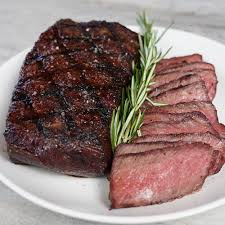

In [152]:
from PIL import Image
# Image is manually uploaded on google colab to make prediction
test_input_img = Image.open('/content/steak_1.jpg')
print(f"Height:{test_input_img.height},Width:{test_input_img.width}")
test_input_img

In [153]:
# Get the image_transformer
test_input_img_tr = img_transformer(test_input_img)
test_input_img_tr.shape

torch.Size([3, 64, 64])

In [154]:
# Load the saved model
inference_model = TinyVGG(input_shape=3,hidden_units=10,output_shape=3)
inference_model.load_state_dict(torch.load(MODEL_PATH+MODEL_FILENAME,weights_only=True))
inference_model

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [155]:
inference_model.eval()
with torch.inference_mode():
  loss = inference_model(test_input_img_tr.unsqueeze(dim=0))
  pred_class = torch.softmax(loss,dim=1).argmax().item()
  print(f"Predicted class: {class_names[pred_class]}")

Predicted class: steak
